# **Analyzing StackOverflow 2022 Survey**

In [24]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [25]:
# loading the dataset to pandas dataframe
df = pd.read_csv('./survey_results_public_2022.csv')
# loading the schema to pandas dataframe
schema = pd.read_csv('./survey_results_schema_2022.csv')

In [26]:
# number of rows and columns in the dataset
df.shape

(73268, 79)

In [27]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [28]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

# **What are the top three countries where respondents come from?**

In [30]:
# number of countries that are part of the survey
df['Country'].nunique()

180

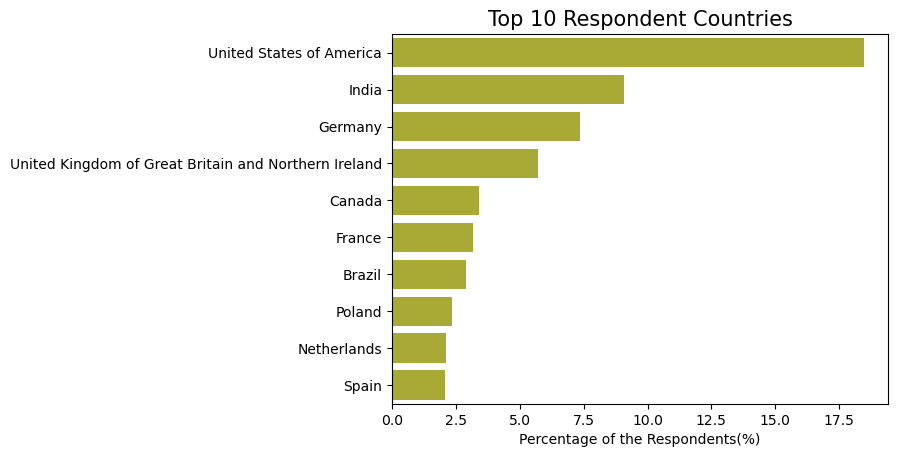

In [97]:
top10_countries = (df['Country'].value_counts()/(df.shape[0]))*100
top10_countries = top10_countries.iloc[:10]
sns.barplot(y=top10_countries.index, x=top10_countries, color=sns.color_palette()[8])
plt.xlabel('Percentage of the Respondents(%)')
plt.title('Top 10 Respondent Countries', fontsize=15);

**The survey included participants from 180 nations and territories. USA, India, and Germany are the three leading nations.**

# **Does knowing more number of languages result in higher salaries?**

In [32]:
# dataframe consisting the required columns to answer our questions
df_sub = df[['Country','MainBranch','Employment','LanguageHaveWorkedWith','LanguageWantToWorkWith','ConvertedCompYearly']]

In [33]:
def count_languages(df, col_name, new_col_name):
    '''
    Adds a new column to the DataFrame indicating the number of languages listed in a semicolon-separated string in a specified column.
    
    - df: dataset.
    - col_name: Name of the column containing the semicolon-separated string of languages.
    - new_col_name: Name of the new column to be added to the DataFrame.
    '''
    df[new_col_name] = df[col_name].astype(str).str.split(';').apply(len)

In [34]:
count_languages(df_sub,'LanguageHaveWorkedWith', 'lang_worked_count')

In [35]:
df_sub.head()

,Country,MainBranch,Employment,LanguageHaveWorkedWith,LanguageWantToWorkWith,ConvertedCompYearly,lang_worked_count
0,NaN,None of these,NaN,NaN,NaN,NaN,1
1,Canada,I am a developer by profession,"Employed, full-time",JavaScript;TypeScript,Rust;TypeScript,NaN,2
2,United Kingdom of Great Britain and Northern I...,"I am not primarily a developer, but I write co...","Employed, full-time",C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,40205.0,5
3,Israel,I am a developer by profession,"Employed, full-time",C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,215232.0,4
4,United States of America,I am a developer by profession,"Employed, full-time",C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,6


In [36]:
def filter_data(df,column_name, column_value, column_name_1, column_value_1):
    '''Filters the dataset based on the specified column names and values, and drops any rows containing missing values.
    
    Args:
    - df: dataset.
    - column_name: Name of the first column to filter on.
    - column_value: Value to filter on in the specified column.
    - column_name_1: Name of the second column to filter on.
    - column_value_1: Value to filter on in the second column.
    
    Returns:
    - dataset containing only the rows with the applied condition and with missing values dropped.
    
    '''
    return df.query(f" {column_name} == '{column_value}' and {column_name_1} == '{column_value_1}' ").dropna()

In [59]:
# applying the filter_data function to filter the dataset for the country United States of America
america = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'United States of America')

# applying the filter_data function to filter the dataset for the country India
india = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'India')

# applying the filter_data function to filter the dataset for the country Germany
germany = filter_data(df_sub, 'MainBranch', 'I am a developer by profession', 'Country', 'Germany')

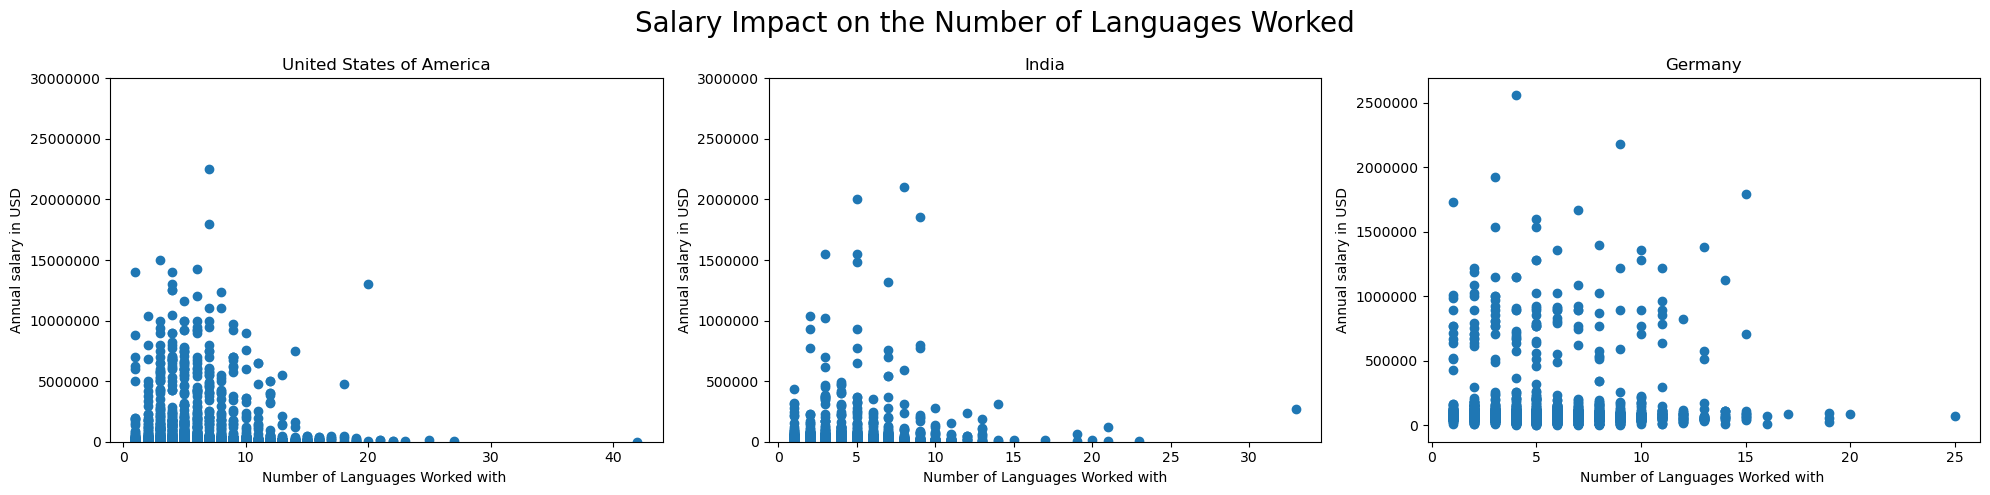

In [91]:
plt.figure(figsize=[20,5])
plt.suptitle('Salary Impact on the Number of Languages worked', fontsize=20)

plt.subplot(1,3,1)
plt.scatter(x=america['lang_worked_count'], y=america['ConvertedCompYearly'])
plt.xlabel('Number of Languages Worked with ')
plt.ylabel('Annual salary in USD')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.ylim(0, 30000000)
plt.title('United States of America')

plt.subplot(1,3,2)
plt.scatter(x=india['lang_worked_count'], y=india['ConvertedCompYearly']  )
plt.xlabel('Number of Languages Worked with')
plt.ylabel('Annual salary in USD')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.ylim(0, 3000000)
plt.title('India')

plt.subplot(1,3,3)
plt.scatter(x=germany['lang_worked_count'], y=germany['ConvertedCompYearly'])
plt.xlabel('Number of Languages Worked with ')
plt.ylabel('Annual salary in USD')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title('Germany');

plt.tight_layout()

**It seems that optimal numbers of languages to know, such as 3 to 7 lead to the maximum wages in all three countries.**

# **What are the languages that earned the highest salaries?**

In [39]:
def get_top_20_percent(df, column_name):
    ''' 
    Filters the dataset to only include the top 20% of values in a specified column
    
    Args:
    - df: dataset
    - column_name: Name of the column to filter on
    
    Returns:
    - dataset containing only the top 20% of values in the specified column
    
    '''
    # Sort the values in the specified column in descending order
    sorted_salaries = df[column_name].sort_values(ascending=False)

    # Calculate the value top 20% and covers to int 
    top_20_index = int(len(sorted_salaries) * 0.2)

    # Select the top 20% of values from the sorted column
    top_20_salaries = sorted_salaries[:top_20_index]

    # Filter the dataset to only include rows where the value in the specified column is in the top 20%
    top_20_percent_df = df[df[column_name].isin(top_20_salaries)]
    
    return top_20_percent_df

In [69]:
# applying a function to return the dataframes consisting top 20% salaries for the country United States of America, India and Germany
top_20_percent_america = get_top_20_percent(america, 'ConvertedCompYearly')

top_20_percent_india = get_top_20_percent(india, 'ConvertedCompYearly')

top_20_percent_germany = get_top_20_percent(germany, 'ConvertedCompYearly')

In [79]:
def split_count_prop(df, col_name):
    '''
    Args:
    - df: A DataFrame
    - col_name: name of the column to return count and proportion

    Returns:
    - returns the count and proportion of each programming language mentioned in the column
    
    '''
    stacked = df[col_name].str.split(';', expand=True).stack().reset_index()
    stacked = stacked.rename(columns={'level_0': 'Resid', 'level_1': 'Num', 0 : 'Language'})
    course_count = stacked['Language'].value_counts().reset_index().rename(columns={'index': 'Name_of_Language', 'Language': 'Count'})
    course_count['Proportion'] = course_count['Count'] / df.shape[0]
    return course_count

In [88]:
# applying a function to return the dataframe with the courses count and their proportion values
top_20_america_courses_count = split_count_prop(top_20_percent_america, 'LanguageHaveWorkedWith')

top_20_india_courses_count = split_count_prop(top_20_percent_india, 'LanguageHaveWorkedWith')

top_20_germany_courses_count = split_count_prop(top_20_percent_germany, 'LanguageHaveWorkedWith')


In [83]:
def plot_top_courses(df, n, title):
    '''
    Plots a bar chart of the top n courses in dataset, based on the number of occurrences
    
    Args:
    - df: dataframe
    - n: Number of top courses to plot.
    '''
    top_n_courses_count = df.iloc[:n]
    sns.barplot(data=top_n_courses_count, x='Proportion', y='Name_of_Language', color=sns.color_palette()[4])
    plt.title(title)
    plt.xlabel("Proportion")
    plt.ylabel(None)
    # adjusts the spacing between the subplots
    plt.tight_layout()

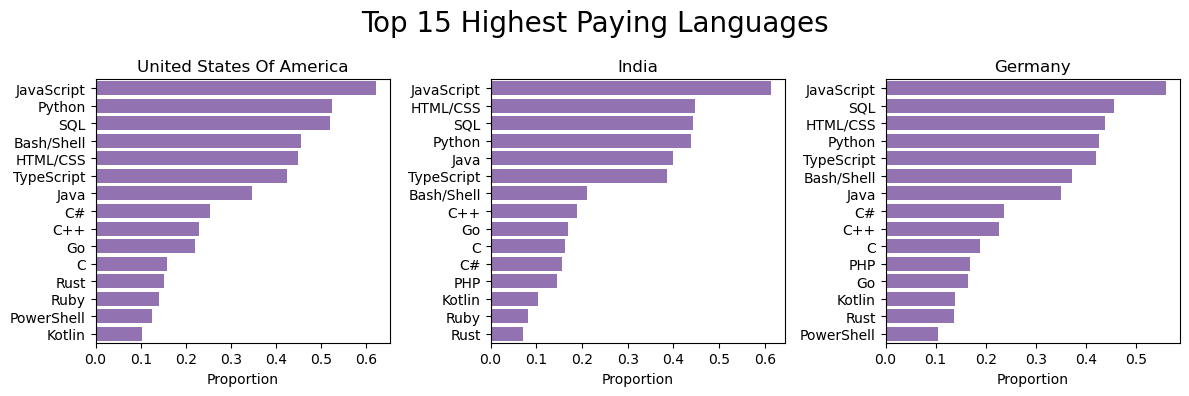

In [84]:
# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Top 15 Highest Paying Languages', fontsize=20)

# applying a function that plots the top n courses with their proportion values
plt.subplot(1,3,1)
plot_top_courses(top_20_america_courses_count, 15, 'United States Of America')


plt.subplot(1,3,2)
plot_top_courses(top_20_india_courses_count, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(top_20_germany_courses_count, 15, 'Germany')


**JavaScript topped the survey,  which is around 60% of the highest earning employees for all the three nations.** 

# **Are the highest-paying languages in accordance with the rest of the workforce?**

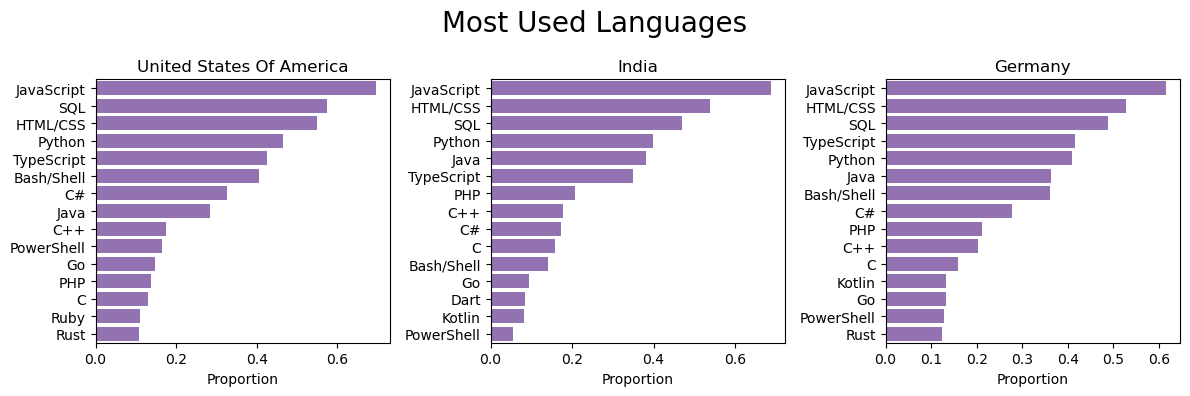

In [89]:
# split_and_stack() - # aplying a function that returns dataframe that splits and stacks the column of string values
# count_courses() - applying a function to return the dataframe with the courses count and their proportion values

usa_all_lang = split_count_prop(america,'LanguageHaveWorkedWith')

india_all_lang = split_count_prop(india,'LanguageHaveWorkedWith')

germany_all_lang = split_count_prop(germany,'LanguageHaveWorkedWith')

# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Most Used Languages', fontsize=20)

plt.subplot(1,3,1)
plot_top_courses(usa_all_lang, 15, 'United States Of America')

plt.subplot(1,3,2)
plot_top_courses(india_all_lang, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(germany_all_lang, 15, 'Germany')


**We could infer from the above plot, that the most commonly used languages in all three countries correspond to the languages used by higher-income developers.**

# **What languages do respondents want to work with in the future?**

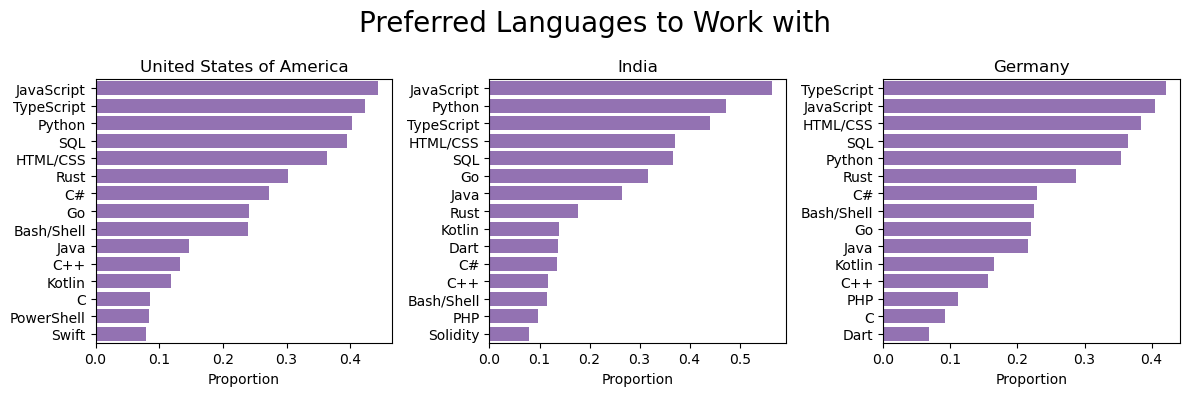

In [90]:
# split_and_stack - applying a function that splits the column of string values
# count_courses - applying a function to return the dataframe with the courses count and their proportion values
usa_wantto_work_lang = split_count_prop(america,'LanguageWantToWorkWith')

india_wantto_work_lang = split_count_prop(india,'LanguageWantToWorkWith')

germany_wantto_work_lang = split_count_prop(germany,'LanguageWantToWorkWith')

# sets the size of overall figure
plt.figure(figsize=(12, 4))
# adds centered title above the subplots
plt.suptitle('Preferred Languages to Work with', fontsize=20)

plt.subplot(1,3,1)
plot_top_courses(usa_wantto_work_lang, 15, 'United States of America')

plt.subplot(1,3,2)
plot_top_courses(india_wantto_work_lang, 15, 'India')

plt.subplot(1,3,3)
plot_top_courses(germany_wantto_work_lang, 15, 'Germany')
